<h1><u><b>Project InstaBot Part 2 </h1></u></b>

<h3> InstaBot - Part 2</h3> 

<h2>ASK 1</h2>
<b><h4>Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.</b></h4>
<b>Task1:</b><br>
From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers<br>
<b>Task2:</b><br>
Now Find the number of posts these handles have done in the previous 3 days.<br>
<b>Task3:</b><br>
Depict this information using a suitable graph.<br>

In [62]:
# Lets Log in to our instagram
# Lets first of all import the required web driver library from selenium package
# Also lets initiate web browser driver

from selenium import webdriver
driver = webdriver.Chrome(executable_path = r'C:\Users\vigya\PycharmProjects\Temp1Learn\chromedriver')

In [59]:
# Now we'll make a URL visit request after visiting lets also maximize window

driver.get("https://www.instagram.com/")
driver.maximize_window()

In [60]:
# After inspecting we found username input box has attribute username
# using which we will locate the particular textbox and send values to it

usernamebutton = driver.find_element_by_name("username")
usernamebutton.send_keys("SAMPLE USERNAME")

In [61]:
# After again inspecting we found Password input box has attribute password
# using which we will locate the particular textbox and send values to it
# Also we will use the submit as it has type submit

passwordbutton = driver.find_element_by_name("password")
passwordbutton.send_keys("SAMPLE PASSWORD")

In [5]:
passwordbutton.submit()

In [6]:
# Now there will be an ask to save info or not 
# so we will not save info currently
# some time this ask doesnt appear on some computer to save info so please consider if it appears 

saveinfo_notnow = driver.find_element_by_class_name("cmbtv")
saveinfo_notnow.click()

In [7]:
# A "Turn on notification" pop up appears which need to be dismissed"
# so we will locate the element by provided class name in html data and click over it

notifypopup_dismiss = driver.find_element_by_class_name("mt3GC")
notifypopup_dismiss.click()

In [8]:
# First thing we will do is we will locate the search bar text box and then send value to the particular box

searchbutton = driver.find_element_by_class_name("XTCLo")
searchbutton.send_keys("food")

In [9]:
# As we have sent the value to textbox now only need is to extract the info by BeautifulSoup

from bs4 import BeautifulSoup
data = BeautifulSoup(driver.page_source, 'html.parser')
names = data.find_all(class_ = "qyrsm")
names

[<div class="_7UhW9 PIoXz qyrsm uL8Hv">Switch</div>,
 <div class="_7UhW9 xLCgt qyrsm _0PwGv uL8Hv">Suggestions For You</div>,
 <div class="_7UhW9 PIoXz qyrsm KV-D4 uL8Hv">See All</div>,
 <div class="_7UhW9 PIoXz qyrsm uL8Hv">Follow</div>,
 <div class="_7UhW9 PIoXz qyrsm uL8Hv">Follow</div>,
 <div class="_7UhW9 PIoXz qyrsm uL8Hv">Follow</div>,
 <div class="_7UhW9 PIoXz qyrsm uL8Hv">Follow</div>,
 <div class="_7UhW9 PIoXz qyrsm uL8Hv">Follow</div>,
 <div class="_7UhW9 xLCgt qyrsm KV-D4 uL8Hv">foodymonkcafe</div>,
 <div class="_7UhW9 xLCgt qyrsm KV-D4 uL8Hv">the.food_cult</div>,
 <div class="_7UhW9 xLCgt qyrsm KV-D4 uL8Hv">delhi_street_food1</div>,
 <div class="_7UhW9 xLCgt qyrsm KV-D4 uL8Hv">foodtalkindia</div>,
 <div class="_7UhW9 xLCgt qyrsm KV-D4 uL8Hv">foodie_incarnate</div>,
 <div class="_7UhW9 xLCgt qyrsm KV-D4 uL8Hv">delhifoodwalks</div>,
 <div class="_7UhW9 xLCgt qyrsm KV-D4 uL8Hv">food</div>,
 <div class="_7UhW9 xLCgt qyrsm KV-D4 uL8Hv">dilsefoodie</div>,
 <div class="_7UhW9 xLC

In [10]:
# To deselect the 1st string i.e "sujjestions for you" and others , Hashtags
# we can run a loop from 8 and include a condition to pass iteration if 1st element of string is "#"
# And as we need only 10 handles we will break loop once its length becomes 10

food_search_List = []
i = 8
while True:
    st = names[i].string
    if st[0] == "#":
        pass
    else:
        food_search_List.append(st)
        print(st)
    if (len(food_search_List) == 10):
        break
    i = i + 1

foodymonkcafe
the.food_cult
delhi_street_food1
foodtalkindia
foodie_incarnate
delhifoodwalks
food
dilsefoodie
fastfoody.mumbai
yourfoodlab


In [11]:
# As earlier we typed food in the searchbar text box we need to clear the particular text 
# For which we need to find the clear button element location and click over it

clearbutton = driver.find_element_by_class_name("aIYm8")
clearbutton.click()

In [12]:
# lets now firstly import required libraries for introducing explicit wait

In [13]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

wait = WebDriverWait(driver,5)

In [17]:
# Lets import time library so as to make a time gap of 3 seconds in between
# Also lets open up any particular handle 
# This we are doing as it becomes easy for us to go with the flow 
# however we wont be extracting the information from over here once our main loop will start we will start extracting information

import time
searchbutton = driver.find_element_by_class_name("XTCLo")
searchbutton.send_keys("sodelhi")

wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))
Option_button = driver.find_element_by_class_name("-qQT3")
Option_button.click()
time.sleep(3)



# Firstly we will take a NumberOfFollowers_List as empty list in which we will append the number of followers for all 10 handles
# also we will take a NumberOfPosts_List as empty list in which we will append the number of posts for all 10 handles
# we have a food_search_List having top 10 handles when we search "food" in search box
# we will traverse over each 10 handle of food_search_List
# locate search bar and send each handle one by one to that search box
# then we have introduced a wait untill the earch sujjestion appears
# then we have located all web elements in the sujjestion which are clickable in Option_button
# also for names of each sujjestion we have located each web elements in nameOf_pages_in_search by class name inspecting
# then we willrun a loop over nameOf_pages_in_search length and once the handle name matches with "i" i.e handle of outer loop
# outer loop that is working over food_search_List (our main 10 handles)
# if matches we will take the number when it mattches in takenumber
# we have done this if in case we search for food and food doesnt appear at first so we need to traverse over each sujjestion
# and find "food" and then click over it and find its follower number

# after we have takenumber we will click over that option sujjestion 
# after clicking we will again wait until the page opens
# then we will locate the follower button and get its title attribute value i.e followers in form of string

# Also we will locate the number of posts and get its "innerHTML" i.e NumberOfposts in string form

# we will take an empty string temp and run a loop overfollowers string
# we will remove "," from string and type cast it into int and put into Particular_NumberOfFollowers
# Lastly we will append it into NumberOfFollowers_List

# we will take an empty string temp_posts and run a loop overPosts string
# we will remove "," from string and type cast it into int and put into Particular_NumberOfPosts
# Lastly we will append it into NumberOfPosts_List

# and then run a loop and print handle and its corresponding followers and corresponding Total Number of posts


NumberOfFollowers_List = []
NumberOfPosts_List = []
for i in food_search_List:

    searchbutton = driver.find_element_by_class_name("XTCLo")
    searchbutton.send_keys(i)

    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))
    Option_button = driver.find_elements_by_class_name("-qQT3")
    nameOf_pages_in_search = driver.find_elements_by_class_name("uL8Hv         ")
    for x in range(len(nameOf_pages_in_search)):
        nameOf_pages_in_search = driver.find_elements_by_class_name("uL8Hv         ")
        name = nameOf_pages_in_search[x].get_attribute("innerHTML")
        if i == name:
            takenumber = x
    
    Option_button[takenumber].click()

    wait.until(EC.presence_of_element_located((By.XPATH, '//ul[@class = "k9GMp "]/li[2]/a/span')))
    NumberOfFollowers = driver.find_element_by_xpath('//ul[@class = "k9GMp "]/li[2]/a/span')
    
    # ---------------
    NumberOfposts = driver.find_element_by_xpath('//ul[@class = "k9GMp "]/li[1]/span/span')
    sposts = NumberOfposts.get_attribute("innerHTML")
    
    
    s = NumberOfFollowers.get_attribute("title")
    temps = ""
    for j in s:
        if j == ",":
            continue
        temps = temps + j
    Particular_NumberOfFollowers = int(temps)
    NumberOfFollowers_List.append(Particular_NumberOfFollowers)
    
    temp_posts = ""
    for j in sposts:
        if j == ",":
            continue
        temp_posts = temp_posts + j
    Particular_NumberOfPosts = int(temp_posts)
    NumberOfPosts_List.append(Particular_NumberOfPosts)
    time.sleep(2)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "XTCLo")))

for i in range(10):
    print(food_search_List[i] ,NumberOfFollowers_List[i] ,NumberOfPosts_List[i])

foodymonkcafe 39 12
the.food_cult 83713 915
delhi_street_food1 45801 588
foodtalkindia 305963 8234
foodie_incarnate 645813 1690
delhifoodwalks 150505 3501
food 136056 784
dilsefoodie 814704 4496
fastfoody.mumbai 6730 189
yourfoodlab 1758967 1297


In [18]:
"""please check the output of the above code
if the outut is wrong kindly rerun the above code"""


'please check the output of the above code\nif the outut is wrong kindly rerun the above code'

In [19]:
# Furthur we will again take an empty list for all (handle name, followers, posts)
# these will have ony 5 elements which has max number of followers

food_search_List_5 = []
NumberOfFollowers_List_5 = []
NumberOfPosts_List_5 = []

# lets import numpy and convert each list we got after completion of code above into np array

import numpy as np
np.array(food_search_List)
np.array(NumberOfFollowers_List)
np.array(NumberOfPosts_List)

# Now we will run a loop for 5 iteration 
# get index of max follower
# append each element into their corresponding lists and the print them
# lastly conver max follower to 0
# and run loop again

for i in range(5):
    ind = np.argmax(NumberOfFollowers_List)
    food_search_List_5.append(food_search_List[ind])
    NumberOfFollowers_List_5.append(NumberOfFollowers_List[ind])
    NumberOfPosts_List_5.append(NumberOfPosts_List[ind])
    print(food_search_List[ind], NumberOfFollowers_List[ind], NumberOfPosts_List[ind])
    NumberOfFollowers_List[ind] = 0
    


yourfoodlab 1758967 1297
dilsefoodie 814704 4496
foodie_incarnate 645813 1690
foodtalkindia 305963 8234
delhifoodwalks 150505 3501


In [20]:
# Before depicting the required information in graph lets import the required libraries

In [21]:
NumberOfPosts_3Days_List_5 = []

for i in food_search_List_5:
    searchbutton = driver.find_element_by_class_name("XTCLo")
    searchbutton.send_keys(i)

    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))
    Option_button = driver.find_elements_by_class_name("-qQT3")
    nameOf_pages_in_search = driver.find_elements_by_class_name("uL8Hv         ")
    for x in range(len(nameOf_pages_in_search)):
        name = nameOf_pages_in_search[x].get_attribute("innerHTML")
        if i == name:
            takenumber = x
    
    Option_button[takenumber].click()
    post_button = driver.find_elements_by_class_name("_9AhH0")
    i = 0
    countposts = 0
    while True:
        post_button[i].click()
        wait.until(EC.presence_of_element_located((By.XPATH, "//a[@class = 'c-Yi7']/time")))
        date_element = driver.find_element_by_xpath('//a[@class = "c-Yi7"]/time')
        datestring = date_element.get_attribute("innerHTML")
        cross_button = driver.find_element_by_class_name("BI4qX            ")
        cross_button.click()
        if "hour" in datestring or "minute" in datestring or "second" in datestring:
            countposts = countposts + 1
        elif "day" in datestring:
            if datestring == "1 day ago" or datestring == "2 days ago" or datestring == "3 days ago":
                countposts = countposts + 1
            else:
                break
        i = i + 1
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_9AhH0")))
    NumberOfPosts_3Days_List_5.append(countposts)
    searchbar = driver.find_element_by_class_name("Di7vw ")
    searchbar.click()
    clearbutton = driver.find_element_by_class_name("aIYm8")
    clearbutton.click()
for i in range(5):
    print(food_search_List_5[i], NumberOfPosts_3Days_List_5[i])

yourfoodlab 2
dilsefoodie 6
foodie_incarnate 6
foodtalkindia 6
delhifoodwalks 6


In [22]:
import matplotlib.pyplot as plt
from matplotlib import style

In [23]:
# we have handles , no. of followers and no. of posts to show in graph
# All three informations are quite necessary to be shown

# BUBBLE GRAPH can be considered as best in this scenerio

In [24]:
# As if we see that NumberOfFollowers_List_5 is having values less than 10 
# so in terms of size it is quite difficult to understand the diffrence between each sizes
# as each of them will represent a small point 
# so we will multiply each element by 1000 in order to see the diffrence 

In [25]:
for i in range(len(NumberOfPosts_3Days_List_5)):
    NumberOfPosts_3Days_List_5[i] = NumberOfPosts_3Days_List_5[i] * 1000
    

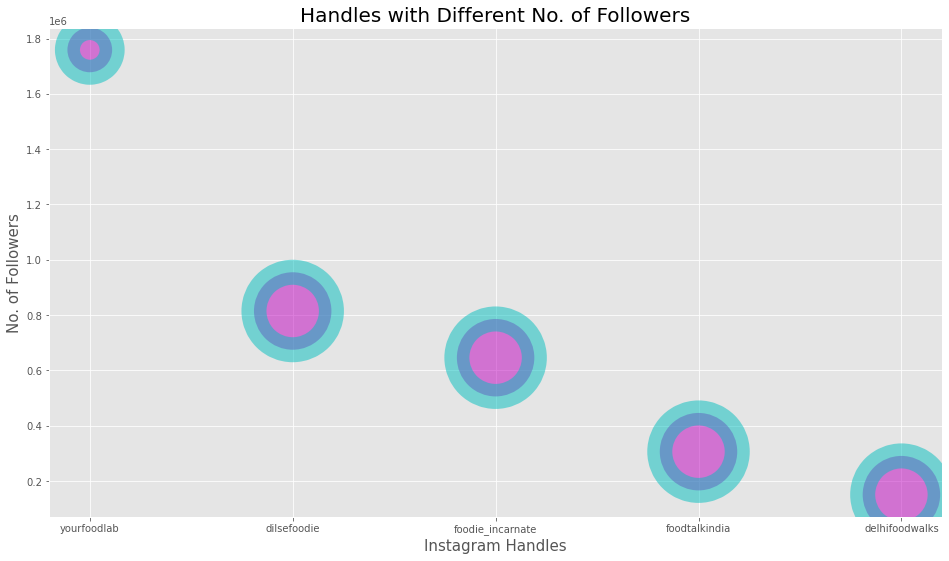

In [26]:
x = food_search_List_5
y = NumberOfFollowers_List_5
size = NumberOfPosts_3Days_List_5
style.use("ggplot")
plt.figure(figsize = (16, 9) )
plt.scatter(x, y, s=size,c="m", marker="o", alpha = 0.5, edgecolor = "c", linewidth = 25)
plt.xlabel("Instagram Handles", fontsize = 15)
plt.ylabel("No. of Followers", fontsize = 15)
plt.title("Handles with Different No. of Followers", fontsize = 20)



plt.show()

<h2>ASK 2</h2>
<b><h4>Your friend also needs a list of hashtags that he should use in his posts.</b></h4>
<b>Task1:</b><br>
Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.<br>
<b>Task2:</b><br>
Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.<br>
<b>Task3:</b><br>
Create a csv file with two columns : the word and its frequency<br>
<b>Task4:</b><br>
Now, find the hashtags that were most popular among these bloggers<br>
<b>Task5:</b><br>
Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.<br>

In [27]:
# we need to search all 5 handles fetch their contents
# also convert their contents into words later to find out their frequency
# we will import BeautifulSoup for extaction purpose
# we will traverse over each handle from the list - > "food_search_List_5"
# search that particular handle by sending the value in the search box by locating it through inspecting
# then we will introduce some explicit wait
# once the sujjestion options appear wait will be over and we will store each sujjestion elemnt into Option_button
# also name of each sujjestion will be stored in nameOf_pages_in_search

# also for names of each sujjestion we have located each web elements in nameOf_pages_in_search by class name inspecting
# then we willrun a loop over nameOf_pages_in_search length and once the handle name matches with "i" i.e handle of outer loop
# outer loop that is working over food_search_List_5 (our main 5 handles)
# if matches we will take the number when it mattches in takenumber
# we have done this if in case we search for food and food doesnt appear at first so we need to traverse over each sujjestion
# and find "food" and then click over it and find its follower number

# For first 10 posts we will run a loop for 10 iterations
# in this loop we will click over post extract the html data of whole page using page_source
# and after that using Beautiful soup extract the content of each post
# also converting the content into seprate list of words
#lastly crossing the post 

In [28]:
from bs4 import BeautifulSoup

content_list = []
post_contents_word_list = []

for h in food_search_List_5:
    searchbutton = driver.find_element_by_class_name("XTCLo")
    searchbutton.send_keys(h)

    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))
    Option_button = driver.find_elements_by_class_name("-qQT3")
    nameOf_pages_in_search = driver.find_elements_by_class_name("uL8Hv         ")
    for x in range(len(nameOf_pages_in_search)):
        name = nameOf_pages_in_search[x].get_attribute("innerHTML")
        if i == name:
            takenumber = x
    Option_button[takenumber].click()
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_9AhH0")))
    
    for i in range(10):
        post_button = driver.find_elements_by_class_name("_9AhH0")
        post_button[i].click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "C4VMK")))
        data = BeautifulSoup(driver.page_source)
        content = list(data.find(class_ = "C4VMK").strings)
        co = ""
        for i in range(2, len(content) - 1):
            co = co + " " + content[i]
            sp = content[i].split()
            for w in sp:
                if len(sp) != 0:
                    post_contents_word_list.append(w)
        content_list.append(co)
        cross_button = driver.find_element_by_class_name("BI4qX            ")
        cross_button.click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_9AhH0")))


<b>Content of first 10 posts of each 5 handles</b>

In [29]:
for i in content_list:
    print(i)
    print("================================================================================")

 Schezwan Paneer Paratha recipe is out now on my YouTube channel! Check it out!  My schezwan paneer paratha is a Quesadilla inspired info Chinese Paratha which is super easy to prep & turns out to be super delicious. Whole wheat chapati, schezwan paneer filling, Frankie masala & cheese! Check out the recipe now! . . . . #recipe   #foodporn   #paratha   #indianfood   #streetfoodindia   #quesadilla   #quesadillas   #foodie   #foodpics   #mumbaistreetfood   #streetfood   #streetfoodindia   #sanjyotkeer   #yourfoodlab
 Atom Bomb Chaat by Chef  @sanjyotkeer ATOM BOMB CHAAT!! What??? Check it out on my YouTube channel!  You guys went crazy after I shot this recipe & shared it on my stories. So finally the recipe is out and it’s an amazing chaat recipe which is healthy & full of flavor. Scooped out Boiled Aloo cups filled with a healthy filling topped with home made chutneys, this chaat is a flavor bomb & is healthy too. I have taken inspiration from Kuliya Chaat which is a chaat prepped by s

<b>Seprate Words in List of Content of first 10 posts of each 5 handles</b>

In [30]:
print(post_contents_word_list)

['Schezwan', 'Paneer', 'Paratha', 'recipe', 'is', 'out', 'now', 'on', 'my', 'YouTube', 'channel!', 'Check', 'it', 'out!', 'My', 'schezwan', 'paneer', 'paratha', 'is', 'a', 'Quesadilla', 'inspired', 'info', 'Chinese', 'Paratha', 'which', 'is', 'super', 'easy', 'to', 'prep', '&', 'turns', 'out', 'to', 'be', 'super', 'delicious.', 'Whole', 'wheat', 'chapati,', 'schezwan', 'paneer', 'filling,', 'Frankie', 'masala', '&', 'cheese!', 'Check', 'out', 'the', 'recipe', 'now!', '.', '.', '.', '.', '#recipe', '#foodporn', '#paratha', '#indianfood', '#streetfoodindia', '#quesadilla', '#quesadillas', '#foodie', '#foodpics', '#mumbaistreetfood', '#streetfood', '#streetfoodindia', '#sanjyotkeer', '#yourfoodlab', 'Atom', 'Bomb', 'Chaat', 'by', 'Chef', '@sanjyotkeer', 'ATOM', 'BOMB', 'CHAAT!!', 'What???', 'Check', 'it', 'out', 'on', 'my', 'YouTube', 'channel!', 'You', 'guys', 'went', 'crazy', 'after', 'I', 'shot', 'this', 'recipe', '&', 'shared', 'it', 'on', 'my', 'stories.', 'So', 'finally', 'the', 're

<b>Lets plot a Word Cloud</b>

In [31]:
text = ""
for i in content_list:
    text = text + i

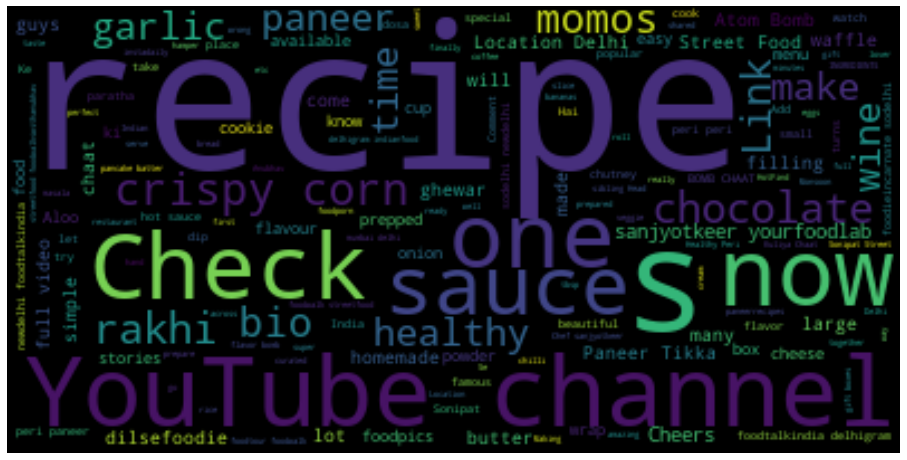

In [32]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
plt.figure(figsize = (16, 9) )
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

# plt.figure(figsize=(20,20))
plt.axis("off")
plt.show()

In [33]:
# lets get the frequency of each word using dictnary

In [34]:
d = {}
for i in post_contents_word_list:
    if i in d:
        d[i] = d[i] + 1
    else:
        d[i] = 1
d

{'Schezwan': 1,
 'Paneer': 10,
 'Paratha': 2,
 'recipe': 31,
 'is': 74,
 'out': 33,
 'now': 9,
 'on': 40,
 'my': 19,
 'YouTube': 19,
 'channel!': 6,
 'Check': 12,
 'it': 29,
 'out!': 4,
 'My': 2,
 'schezwan': 2,
 'paneer': 8,
 'paratha': 2,
 'a': 93,
 'Quesadilla': 1,
 'inspired': 1,
 'info': 1,
 'Chinese': 3,
 'which': 16,
 'super': 3,
 'easy': 6,
 'to': 63,
 'prep': 1,
 '&': 55,
 'turns': 5,
 'be': 4,
 'delicious.': 1,
 'Whole': 1,
 'wheat': 3,
 'chapati,': 1,
 'filling,': 3,
 'Frankie': 1,
 'masala': 5,
 'cheese!': 1,
 'the': 97,
 'now!': 5,
 '.': 56,
 '#recipe': 6,
 '#foodporn': 12,
 '#paratha': 1,
 '#indianfood': 9,
 '#streetfoodindia': 9,
 '#quesadilla': 1,
 '#quesadillas': 1,
 '#foodie': 8,
 '#foodpics': 6,
 '#mumbaistreetfood': 5,
 '#streetfood': 17,
 '#sanjyotkeer': 10,
 '#yourfoodlab': 10,
 'Atom': 3,
 'Bomb': 3,
 'Chaat': 3,
 'by': 13,
 'Chef': 4,
 '@sanjyotkeer': 4,
 'ATOM': 2,
 'BOMB': 2,
 'CHAAT!!': 2,
 'What???': 2,
 'You': 6,
 'guys': 3,
 'went': 2,
 'crazy': 2,
 'after

In [35]:
word = list(d.keys())
frequency = list(d.values())

In [36]:
# Now we will make a 2D list having one element as a list contaning word and its frequency

In [37]:
content_word_frq_details_list = []
for i in range(len(word)):
    content_word_frq_details_list.append([word[i], frequency[i]])

In [38]:
# we have to import pandas 
# as first of all we would be converting this 2D list into dataframe 
# then it would be easier for us to send the particular dataframe to csv file

In [63]:
import pandas as pd
column_names = ['Word', 'Frequency']
df = pd.DataFrame(content_word_frq_details_list, columns=column_names)
df.to_csv('PostContent_word_frq_details.csv', index=False)

In [39]:
# Now for a list of all hastags we can focus on first element of each word in post_contents_word_list
# traverse over it f first element is "#" append it in Total_Hashtags_List

In [40]:

Total_Hashtags_List = []
for i in post_contents_word_list:
    if i[0] == "#":
        Total_Hashtags_List.append(i)
Total_Hashtags_List

['#recipe',
 '#foodporn',
 '#paratha',
 '#indianfood',
 '#streetfoodindia',
 '#quesadilla',
 '#quesadillas',
 '#foodie',
 '#foodpics',
 '#mumbaistreetfood',
 '#streetfood',
 '#streetfoodindia',
 '#sanjyotkeer',
 '#yourfoodlab',
 '#recipe',
 '#chaat',
 '#aloo',
 '#aloorecipes',
 '#chaatlover',
 '#chaatlove',
 '#streetfood',
 '#indianstreetfood',
 '#foodporn',
 '#recipes',
 '#inovation',
 '#atombomb',
 '#streetphotography',
 '#sanjyotkeer',
 '#yourfoodlab',
 '#recipe',
 '#chaat',
 '#aloo',
 '#aloorecipes',
 '#chaatlover',
 '#chaatlove',
 '#streetfood',
 '#indianstreetfood',
 '#foodporn',
 '#recipes',
 '#inovation',
 '#atombomb',
 '#streetphotography',
 '#sanjyotkeer',
 '#yourfoodlab',
 '#recipe',
 '#foodie',
 '#indiancuisine',
 '#streetfood',
 '#wrap',
 '#foodporn',
 '#roll',
 '#paneer',
 '#paneerrecipes',
 '#paneerlover',
 '#paneerroll',
 '#sanjyotkeer',
 '#yourfoodlab',
 '#indianfood',
 '#instadaily',
 '#recipe',
 '#foodie',
 '#indiancuisine',
 '#streetfood',
 '#wrap',
 '#foodporn',
 '

In [41]:
# lets get the frequency of each hashtag using dictnary

In [42]:
dh = {}
for i in Total_Hashtags_List:
    if i in dh:
        dh[i] = dh[i] + 1
    else:
        dh[i] = 1
dh

{'#recipe': 6,
 '#foodporn': 12,
 '#paratha': 1,
 '#indianfood': 9,
 '#streetfoodindia': 9,
 '#quesadilla': 1,
 '#quesadillas': 1,
 '#foodie': 8,
 '#foodpics': 6,
 '#mumbaistreetfood': 5,
 '#streetfood': 17,
 '#sanjyotkeer': 10,
 '#yourfoodlab': 10,
 '#chaat': 2,
 '#aloo': 2,
 '#aloorecipes': 2,
 '#chaatlover': 2,
 '#chaatlove': 2,
 '#indianstreetfood': 6,
 '#recipes': 2,
 '#inovation': 2,
 '#atombomb': 2,
 '#streetphotography': 2,
 '#indiancuisine': 6,
 '#wrap': 2,
 '#roll': 2,
 '#paneer': 4,
 '#paneerrecipes': 4,
 '#paneerlover': 2,
 '#paneerroll': 2,
 '#instadaily': 4,
 '#mexicanfood': 1,
 '#mexicanrice': 1,
 '#mexicancuisine': 1,
 '#mexicanfoodporn': 1,
 '#foodphotography': 1,
 '#streetfoodmumbai': 1,
 '#food': 1,
 '#foodstagram': 3,
 '#indiaclicks': 1,
 '#crispy': 2,
 '#corn': 3,
 '#sweetcorn': 2,
 '#cornrecipe': 2,
 '#homemade': 4,
 '#streetfoodlover': 2,
 '#recipeoftheday': 2,
 '#foodiesofinstagram': 6,
 '#paneertikka': 2,
 '#paneertikkamasala': 2,
 '#resturant': 2,
 '#restuaran

In [43]:
hashtag_name = np.array(list(dh.keys()))
hashtag_frequency = np.array(list(dh.values()))

In [44]:
# Now we will sort these hashtags according to thei frequency using argmax index 
# then later converting that index of max frequency to 0 , and continuing the iteration

In [45]:
hashtag_name_sorted = []
hashtag_frequency_sorted = []
for i in range(len(hashtag_frequency)):
    ind = np.argmax(hashtag_frequency)
    hashtag_name_sorted.append(hashtag_name[ind])
    hashtag_frequency_sorted.append(hashtag_frequency[ind])
    print(hashtag_name[ind], hashtag_frequency[ind])
    hashtag_frequency[ind] = 0

#streetfood 17
#foodporn 12
#sanjyotkeer 10
#yourfoodlab 10
#indianfood 9
#streetfoodindia 9
#foodie 8
#dilsefoodie 8
#foodieincarnate 8
#delhi 7
#recipe 6
#foodpics 6
#indianstreetfood 6
#indiancuisine 6
#foodiesofinstagram 6
#sodelhi 6
#newdelhi 6
#foodtalkindia 6
#delhigram 6
#delhifoodblogger 6
#mumbaistreetfood 5
#delhifoodie 5
#foodblogger 5
#indianfoodbloggers 5
#delhifood 5
#foodtour 5
#foodwalk 5
#foodwalkswithanubhav 5
#paneer 4
#paneerrecipes 4
#instadaily 4
#homemade 4
#foodgasm 4
#foodpornshare 4
#foodlover 4
#foodgram 4
#delhistreetfood 4
#indianfoodie 4
#desikhana 4
#indianfoodblogger 4
#mumbai 4
#sonipatfoodtour 4
#dfwinsonipat 4
#sonipatstreetfood 4
#foodstagram 3
#corn 3
#reelitfeelit 3
#reelkarofeelkaro 3
#reelsinstagram 3
#reels 3
#HotFind 3
#chaat 2
#aloo 2
#aloorecipes 2
#chaatlover 2
#chaatlove 2
#recipes 2
#inovation 2
#atombomb 2
#streetphotography 2
#wrap 2
#roll 2
#paneerlover 2
#paneerroll 2
#crispy 2
#sweetcorn 2
#cornrecipe 2
#streetfoodlover 2
#recipeofth

In [46]:
# Lets now take two empty list to store top 5 frquencies and their corresponding hashtags

In [47]:
hashtag_name_sorted_5 = []
hashtag_frequency_sorted_5 = []
for i in range(5):
    hashtag_name_sorted_5.append(hashtag_name_sorted[i])
    hashtag_frequency_sorted_5.append(hashtag_frequency_sorted[i])
    print(hashtag_name_sorted[i], hashtag_frequency_sorted[i])

#streetfood 17
#foodporn 12
#sanjyotkeer 10
#yourfoodlab 10
#indianfood 9


In [48]:
# Lastly we will plot a pie graph to depict the same information
# i.e occurance of hashtags

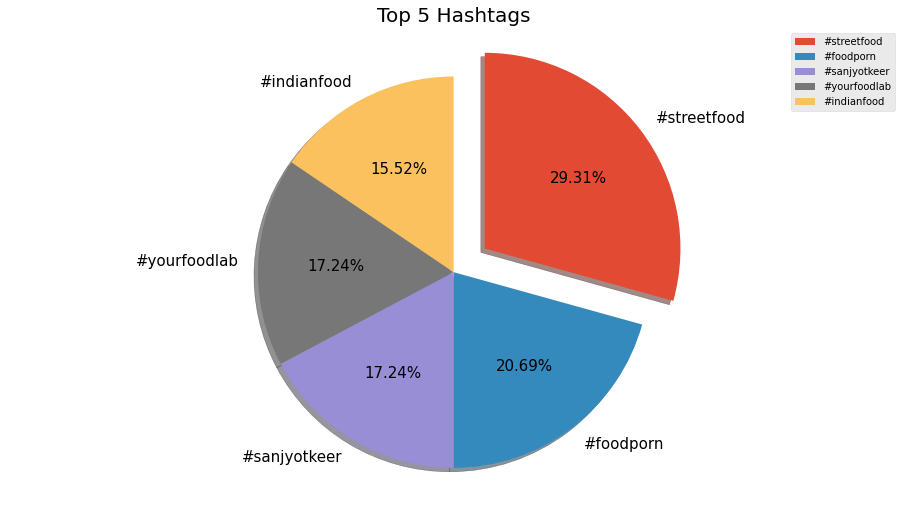

In [49]:
explode = [0.2,0,0,0,0]
textprops = {"fontsize":15}
plt.figure(figsize = (16, 9) )
plt.axis("equal")
plt.pie(hashtag_frequency_sorted_5,labels=hashtag_name_sorted_5,explode = explode, shadow = True,
        textprops = textprops, autopct = "%0.2f%%",counterclock = False , startangle = 90)
plt.title("Top 5 Hashtags", fontsize = 20)
plt.legend()
plt.show()

<h3>We can Analyze that "#streetfood" is the most used Hashtag </h3>

<h2>ASK 3</h2>
<b><h4>You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:</b></h4>
<b>Task1:</b><br>
Find out the likes of the top 10 posts of the 5 handles obtained earlier.<br>
<b>Task2:</b><br>
Calculate the average likes for a handle.<br>
<b>Task3:</b><br>
Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.<br>
<b>Task4:</b><br>
Create a bar graph to depict the above obtained information.<br>


In [50]:
# Here to get like for first 10 posts of each 5 handles
# We will open each handle then each post one by one close it subsequently and then lastly search for next handle
# To close each post we will use key ESCAPE for which we will import Keys and ActionChains

# We will take an empty list Handles_10Posts_Likes_list in which we will store lists of length 10 consisting of likes of 10 posts
# we will run loop for each handle
# search each handle  , wait untill sujjestions appears , match the searched with sujjestion , open it
# wait until posts appears
# open first 10 posts one by one wait till content appears
# try extracting like numbers by locating likes 
# if exception occurs that means the post has video in it so we need to click over views button
# after clicking on views button a small pop up comes which has likes number in it so we can extract now
# after extraction we need to close the window of post
# but we cant click cross button if the post is video as there is pop up for like
# so we will use actionchains for clicking key ESCAPE


In [51]:

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

Handles_10Posts_Likes_list = []

for h in food_search_List_5:
    searchbutton = driver.find_element_by_class_name("XTCLo")
    searchbutton.send_keys(h)

    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))
    Option_button = driver.find_elements_by_class_name("-qQT3")
    nameOf_pages_in_search = driver.find_elements_by_class_name("uL8Hv         ")
    for x in range(len(nameOf_pages_in_search)):
        nameOf_pages_in_search = driver.find_elements_by_class_name("uL8Hv         ")
        name = nameOf_pages_in_search[x].get_attribute("innerHTML")
        if i == name:
            takenumber = x
    Option_button[takenumber].click()
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_9AhH0")))
    
    Single_Handle_10Posts_likes_list = []
    for i in range(10):
        post_button = driver.find_elements_by_class_name("_9AhH0")
        post_button[i].click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "C4VMK")))
        try:
            like_button = driver.find_element_by_xpath("//a[@class = 'zV_Nj']/span")
            Single_Handle_10Posts_likes_list.append(like_button.get_attribute("innerHTML"))
        except:
            views_button = driver.find_element_by_class_name("vcOH2")
            views_button.click()

            wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'vJRqr']/span")))
            like_button2 = driver.find_element_by_xpath("//div[@class = 'vJRqr']/span")
            Single_Handle_10Posts_likes_list.append(like_button2.get_attribute("innerHTML"))

        # create action chain object
        action = ActionChains(driver)

        # perform the operation
        action.send_keys(Keys.ESCAPE).perform()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_9AhH0")))
    Handles_10Posts_Likes_list.append(Single_Handle_10Posts_likes_list)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "XTCLo")))

In [52]:
print(Handles_10Posts_Likes_list)

[['24,015', '27,932', '30,070', '25,846', '27,948', '29,931', '55,497', '31,772', '26,301', '29,594'], ['12,367', '31,373', '11,498', '27,362', '18,568', '16,548', '17,824', '34,571', '37,795', '81,747'], ['22,017', '29,990', '41,898', '63,713', '54,144', '17,534', '55,045', '80,393', '30,521', '47,594'], ['145', '524', '159', '887', '330', '562', '586', '1,090', '1,136', '332'], ['206', '386', '642', '449', '947', '472', '435', '302', '418', '339']]


In [54]:
# Lets now change number of likes string to integer

In [53]:
Handles_10Posts_Likes_list_int = []
for i in Handles_10Posts_Likes_list:
    temp_list = []
    for st in i:
        string = ""
        for s in st:
            if s != ",":
                string = string + s
        temp_list.append(int(string))
    Handles_10Posts_Likes_list_int.append(temp_list)
    
print(Handles_10Posts_Likes_list_int)

[[24015, 27932, 30070, 25846, 27948, 29931, 55497, 31772, 26301, 29594], [12367, 31373, 11498, 27362, 18568, 16548, 17824, 34571, 37795, 81747], [22017, 29990, 41898, 63713, 54144, 17534, 55045, 80393, 30521, 47594], [145, 524, 159, 887, 330, 562, 586, 1090, 1136, 332], [206, 386, 642, 449, 947, 472, 435, 302, 418, 339]]


In [55]:
# average likes for a handle.

Avg_Likes_each_handle = []
for i in Handles_10Posts_Likes_list_int:
    Takesum = 0
    for l in i:
        Takesum = Takesum + l
    eachAvg = Takesum / 10
    Avg_Likes_each_handle.append(eachAvg)
print(Avg_Likes_each_handle)

[30890.6, 28965.3, 44284.9, 575.1, 459.6]


<b>Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.</b>

In [56]:
Followers_Like_ratio_5 = []
for i in range(5):
    div = NumberOfFollowers_List_5[i] / Avg_Likes_each_handle[i]
    Followers_Like_ratio_5.append(div)
print(Followers_Like_ratio_5)

[56.941820489080825, 28.126896666010712, 14.583142335197776, 532.0170405146931, 327.4695387293298]


<b>Plotting Bar Graph</b>

<ipython-input-57-7c5a13600dbb>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, Followers_Like_ratio_5[i]//2, int(Followers_Like_ratio_5[i]), ha='center', Bbox=dict(facecolor='white', alpha=0.3))


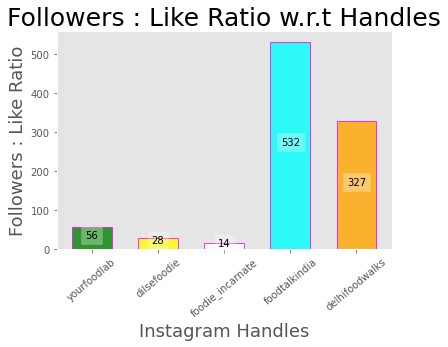

<Figure size 1152x648 with 0 Axes>

In [57]:
def labels(food_search_List_5, Followers_Like_ratio_5):
    for i in range(len(food_search_List_5)):
        plt.text(i, Followers_Like_ratio_5[i]//2, int(Followers_Like_ratio_5[i]), ha='center', Bbox=dict(facecolor='white', alpha=0.3))

plt.bar(food_search_List_5, Followers_Like_ratio_5, width=0.6, color=['green','yellow','white','cyan', 'orange'], edgecolor="magenta", linewidth=1, alpha=0.8)
labels(food_search_List_5, Followers_Like_ratio_5)
style.use('ggplot')
plt.title("Followers : Like Ratio w.r.t Handles", size=25)
plt.xticks(rotation=40)
plt.xlabel("Instagram Handles", size = 18)
plt.ylabel("Followers : Like Ratio", size = 18)

plt.grid()
plt.figure(figsize=(16, 9))
plt.show()